# Load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('EDA_df.csv', low_memory=False)
#################################################################################
# Convert all 0.0 to 0 for all columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].replace({'0.0': '0', '0': '0'})

#################################################################################
# Inspect whether there are any columns with no variance
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")

#################################################################################
# Using length of the byte columns
df['tcp.options'] = df['tcp.options'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['tcp.payload'] = df['tcp.payload'].apply(lambda x: len(x) if isinstance(x, str) else 0)

#################################################################################
# One hot encode Attack_type
one_hot_y = pd.get_dummies(df['Attack_type'], prefix='Class')
df.drop(columns ='Attack_type')
df = pd.concat([df, one_hot_y], axis=1)


Constant columns: ['icmp.unused', 'http.tls_port', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.msg_decoded_as', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']


# Attack Type and Attack Label

/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/43061345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x='Attack_label', palette={'0': 'blue', '1': 'red'})
/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/43061345.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack_type', palette=custom_palette)


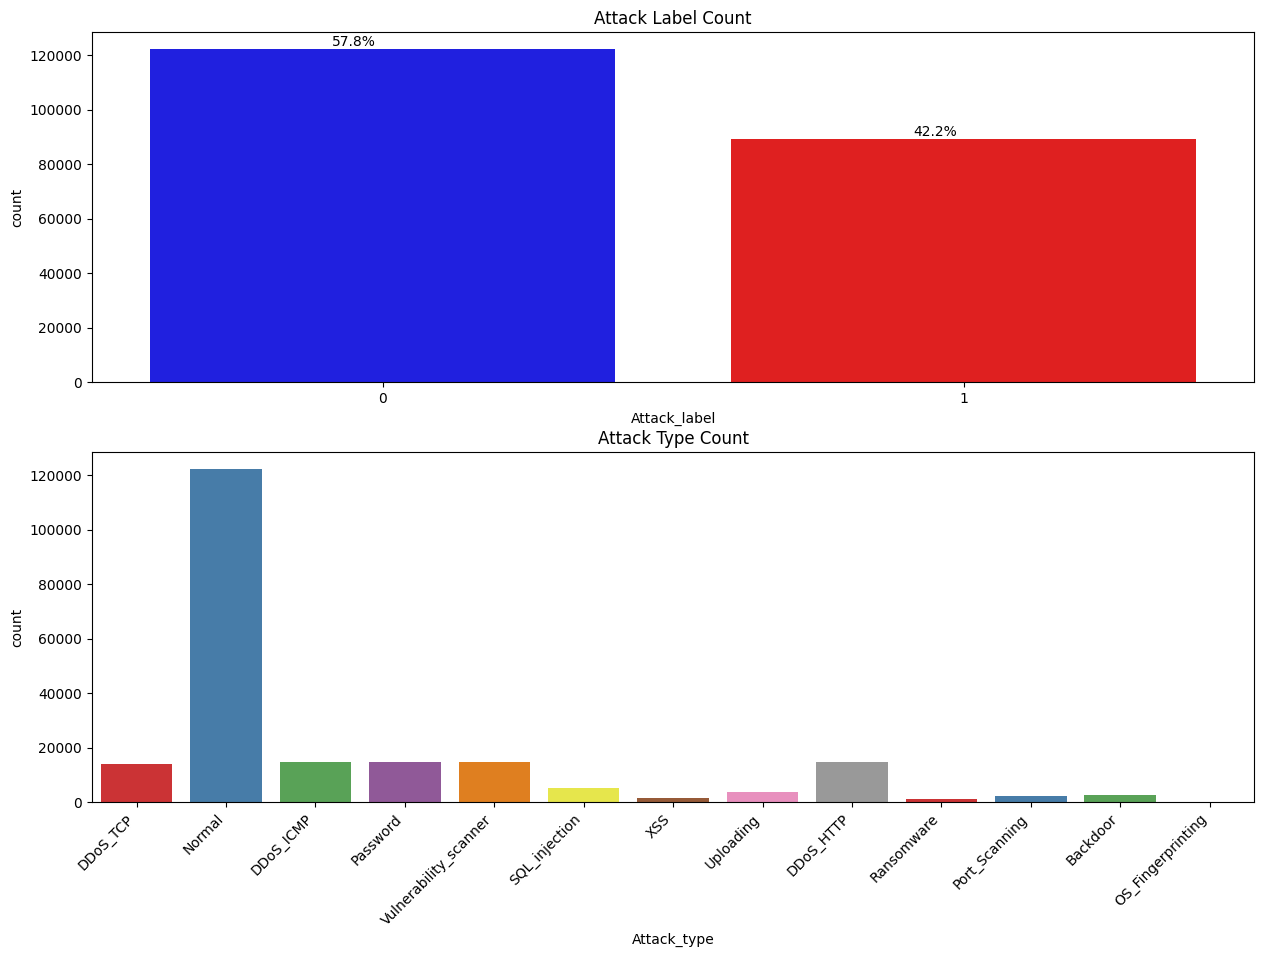

In [5]:
# Plot Bar plot for Attack_label and Attack_type
custom_palette = sns.color_palette("Set1", n_colors=13)
plt.figure(figsize=(15, 10))

# Plot for Attack_label
plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=df, x='Attack_label', palette={'0': 'blue', '1': 'red'})
plt.title('Attack Label Count')

# Calculate percentages and annotate bars
total = len(df['Attack_label'])
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom')

# Plot for Attack_type
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='Attack_type', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Attack Type Count')

plt.show()
# # Plot Bar plot for Attack_label and Attack_type
# custom_palette = sns.color_palette("Set1", n_colors=13)
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# sns.countplot(data=df, x='Attack_label', palette={'0': 'blue', '1': 'red'})
# plt.title('Attack Label Count')
# plt.subplot(2, 1, 2)
# sns.countplot(data=df, x='Attack_type', palette=custom_palette)
# plt.xticks(rotation=45, ha='right')
# plt.title('Attack Type Count')
# plt.show()

# MQTT Columns

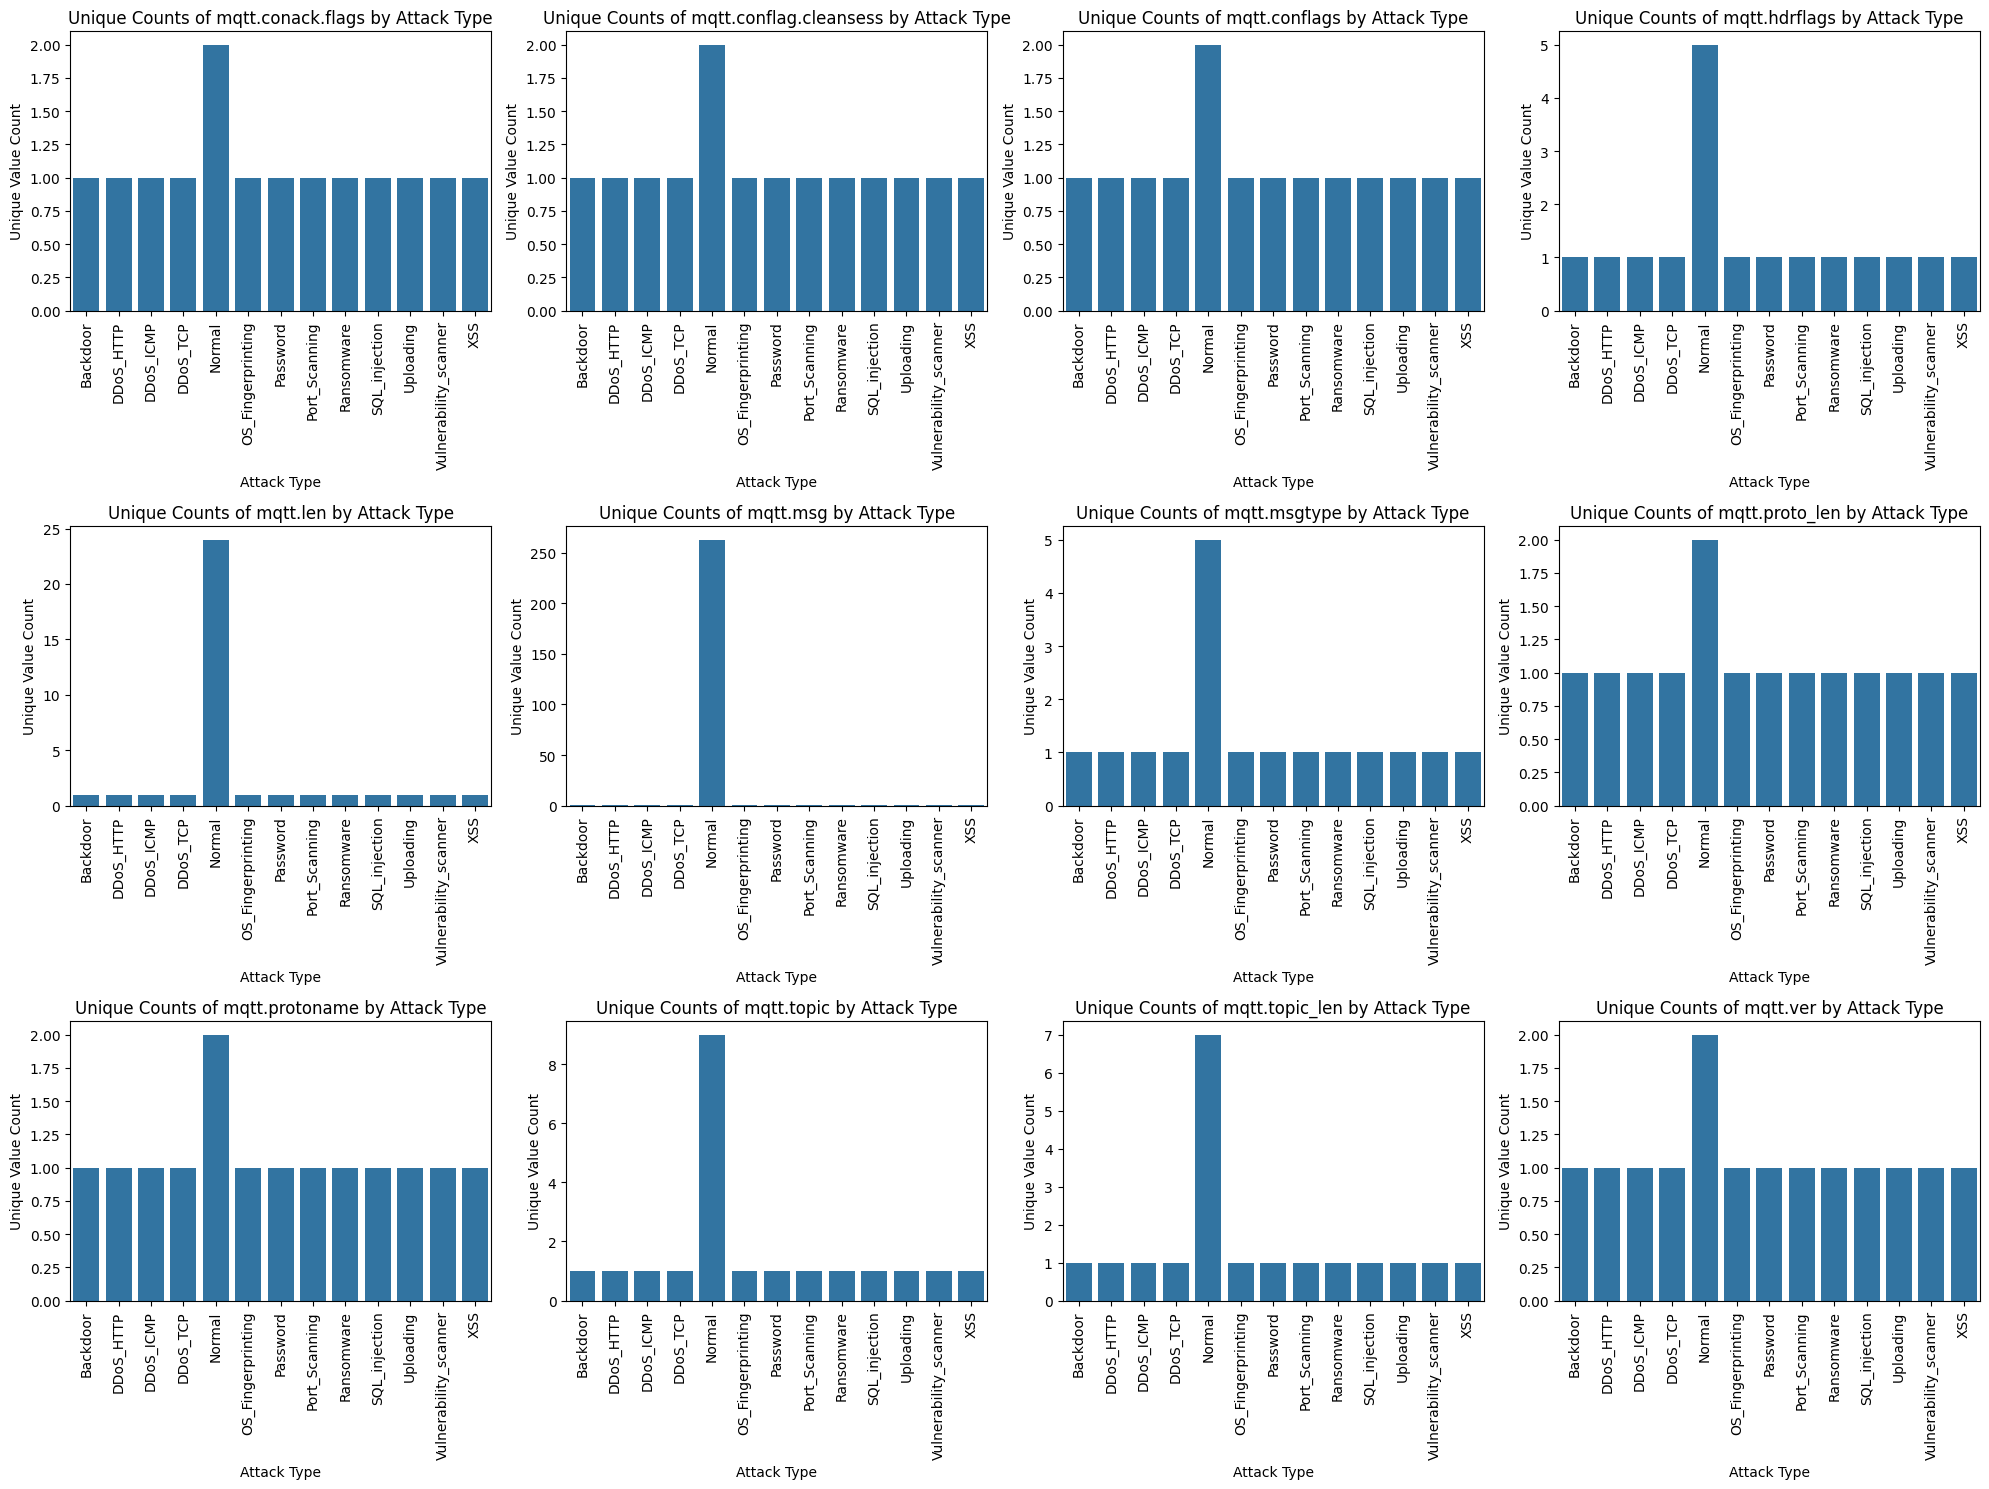

In [6]:
#################################################################################
# Inspecting MQTT columns

columns_mqtt = [
    'mqtt.conack.flags',
    'mqtt.conflag.cleansess',
    'mqtt.conflags',
    'mqtt.hdrflags',
    'mqtt.len',
    'mqtt.msg',
    'mqtt.msgtype',
    'mqtt.proto_len',
    'mqtt.protoname',
    'mqtt.topic',
    'mqtt.topic_len',
    'mqtt.ver'
]
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Loop through each column and create a bar plot
for i, column in enumerate(columns_mqtt):
    unique_counts = df.groupby('Attack_type')[column].nunique().reset_index()

    # Rename the columns for clarity
    unique_counts.columns = ['Attack_type', 'unique_value_count']

    # Create a bar plot for the current column
    sns.barplot(data=unique_counts, x='Attack_type', y='unique_value_count', ax=axes[i])
    axes[i].set_title(f'Unique Counts of {column} by Attack Type')
    axes[i].set_xlabel('Attack Type')
    axes[i].set_ylabel('Unique Value Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels to be vertical

# Hide any unused subplots (if less than 12 columns)
for j in range(len(columns_mqtt), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Unique Values Against columns

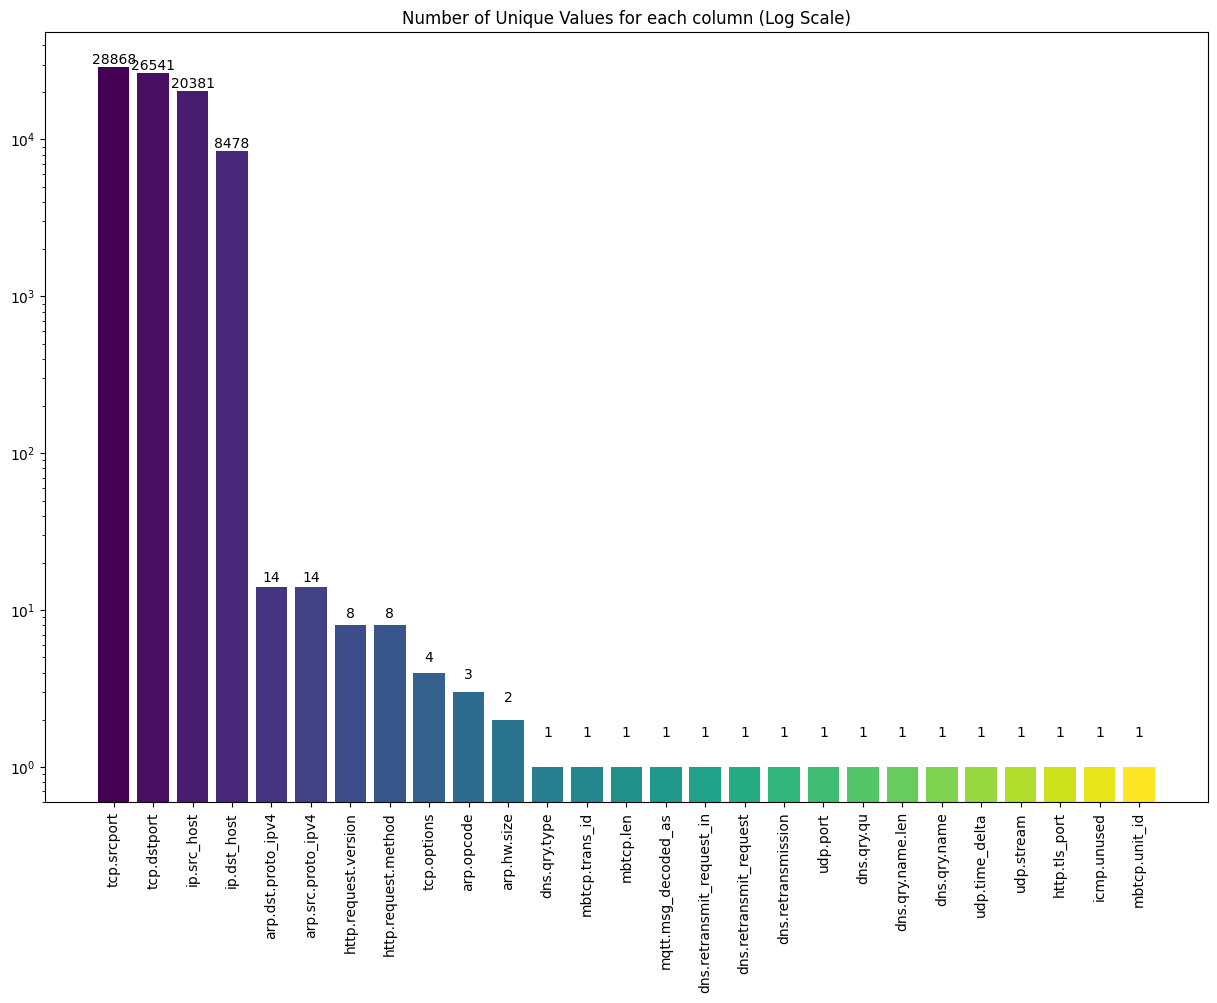

In [7]:
col_name = ['ip.src_host',
            'ip.dst_host',
            'arp.dst.proto_ipv4',
            'arp.opcode',
            'arp.src.proto_ipv4',
            'tcp.dstport',
            'tcp.srcport',
            'tcp.options',
            'arp.hw.size',
            'http.request.method',
            'http.request.version',
            'icmp.unused',
            'http.tls_port',
            'udp.port',
            'udp.stream',
            'udp.time_delta',
            'dns.qry.name',
            'dns.qry.name.len',
            'dns.qry.qu',
            'dns.qry.type',
            'dns.retransmission',
            'dns.retransmit_request',
            'dns.retransmit_request_in',
            'mqtt.msg_decoded_as',
            'mbtcp.len',
            'mbtcp.trans_id',
            'mbtcp.unit_id']

plt.figure(figsize=(15, 10))
unique_counts = df[col_name].nunique().sort_values(ascending=False)
cmap = plt.cm.viridis(np.linspace(0, 1, len(unique_counts)))
plt.bar(unique_counts.index, unique_counts.values, color=cmap)
for i, v in enumerate(unique_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Number of Unique Values for each column (Log Scale)')
plt.show()

# Inspecting for Outliers using Scatterplots

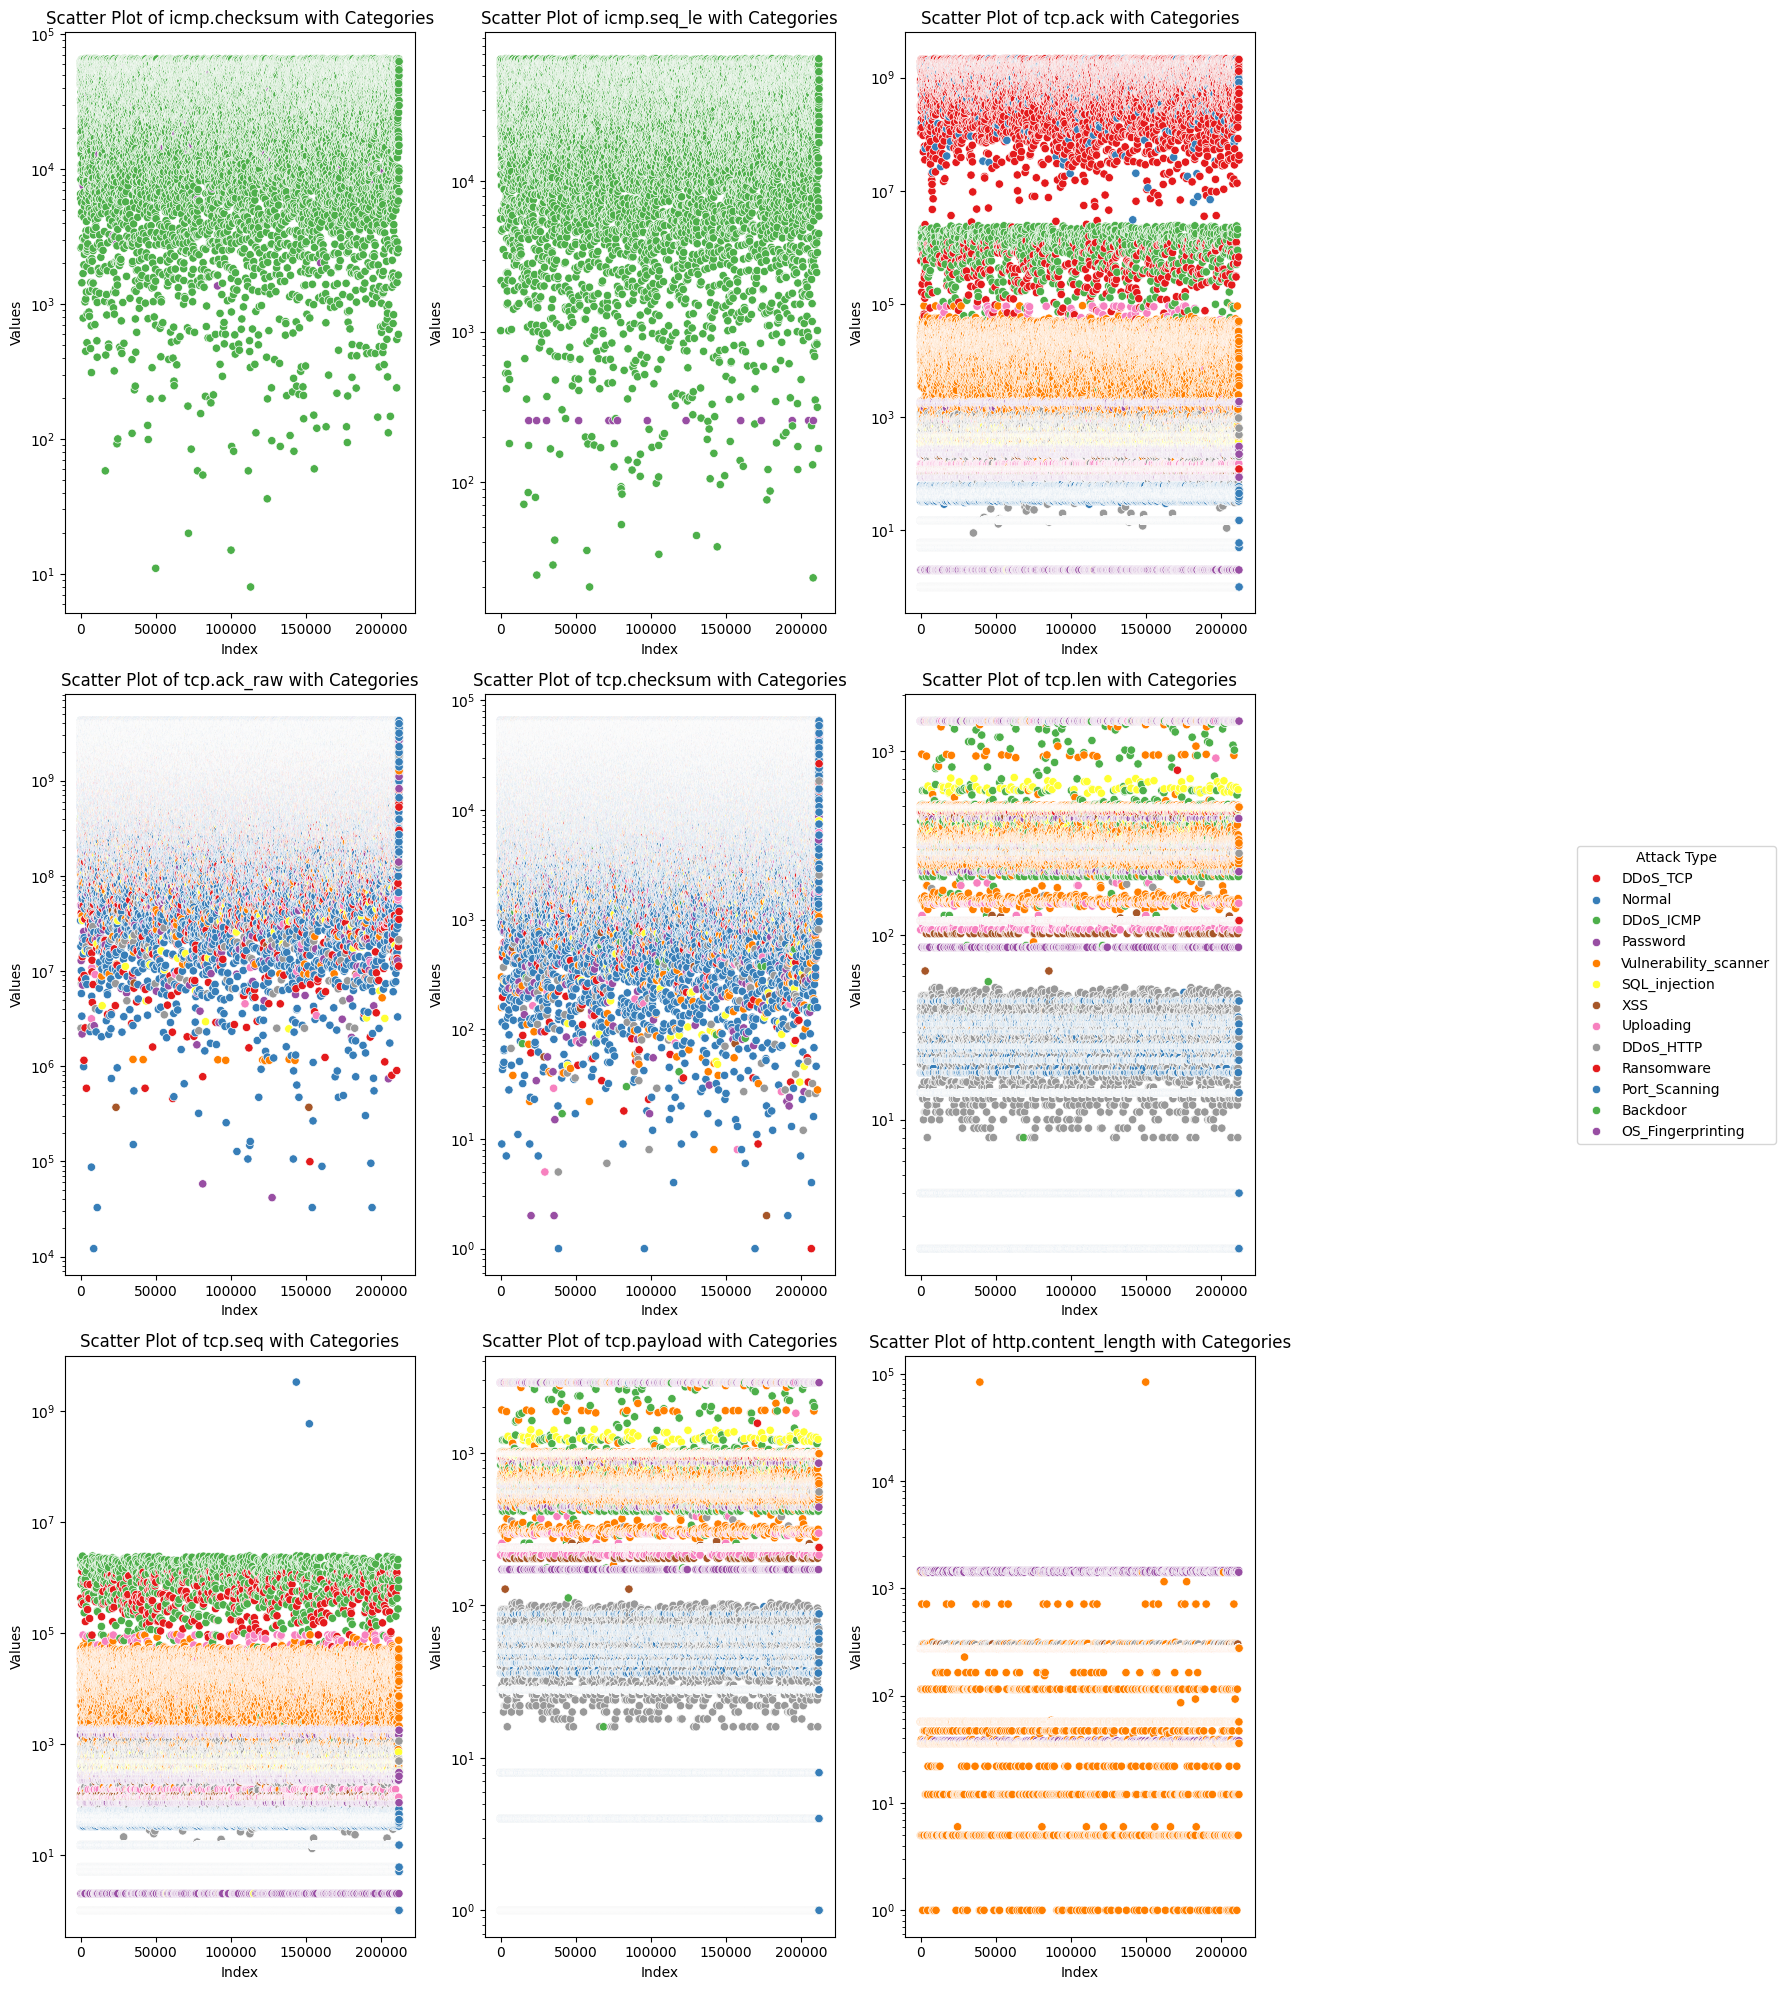

In [8]:
cols_numeric = ['icmp.checksum',
                'icmp.seq_le',
                'tcp.ack',
                'tcp.ack_raw',
                'tcp.checksum',
                'tcp.len',
                'tcp.seq',
                'tcp.payload',
                'http.content_length']


fig, axes = plt.subplots(3, 3, figsize=(15, 20))
axes = axes.flatten()


for i, col in enumerate(cols_numeric):
    sns.scatterplot(
        data=df,
        x=df.index,
        y=col,
        hue='Attack_type',
        palette=custom_palette,
        ax=axes[i]
    )
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Scatter Plot of {col} with Categories')
    axes[i].legend_.remove()  # Remove individual legends to avoid overlap

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Attack Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


In [9]:
# Drop Outliers
df = df[df['tcp.seq'] <= 2500000]
df = df[df['http.content_length'] <= 2000]


# Correlation Between Features

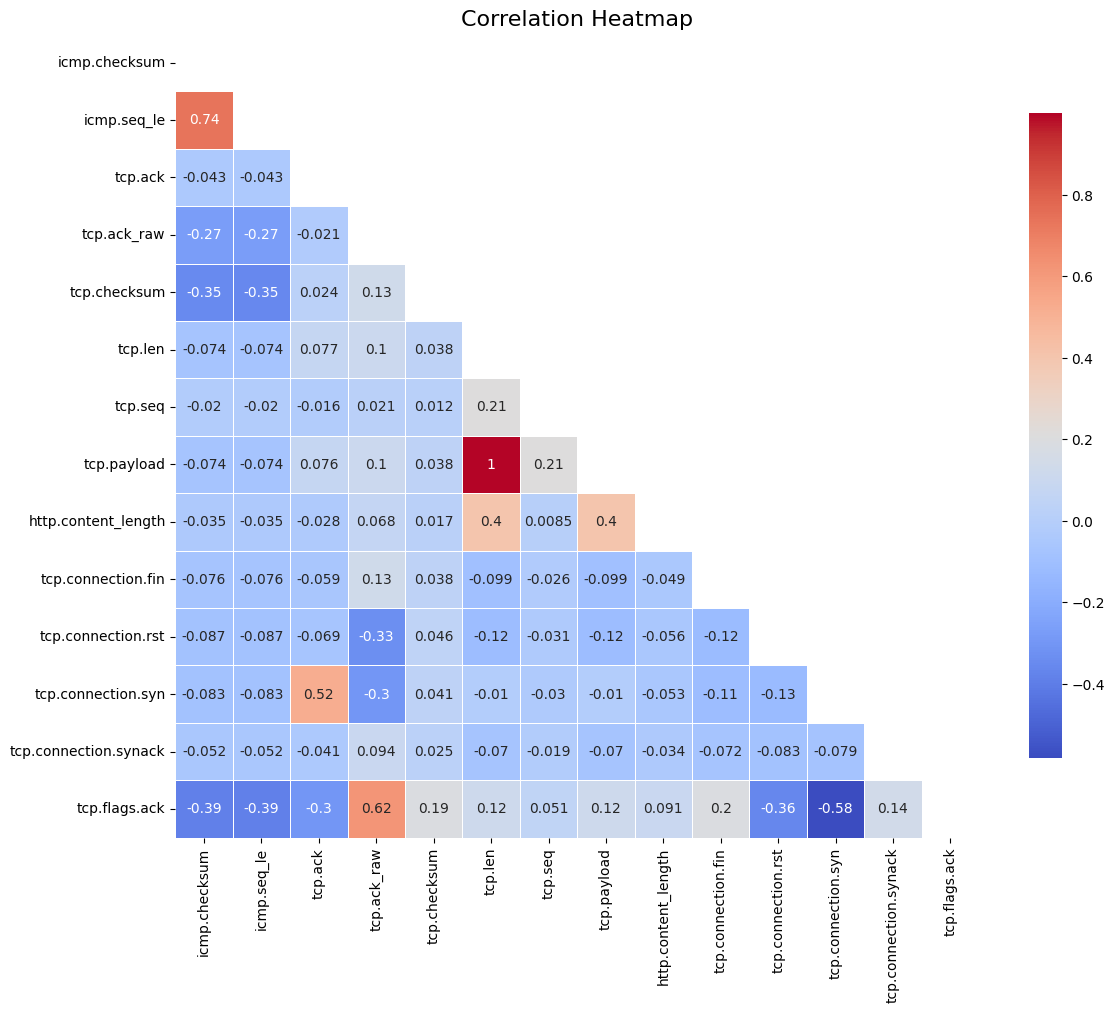

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_numeric = ['icmp.checksum',
                'icmp.seq_le',
                'tcp.ack',
                'tcp.ack_raw',
                'tcp.checksum',
                'tcp.len',
                'tcp.seq',
                'tcp.payload',
                'http.content_length']
cols_boolean = ['tcp.connection.fin',
                'tcp.connection.rst',
                'tcp.connection.syn',
                'tcp.connection.synack',
                'tcp.flags.ack']
df_numeric = df[cols_numeric+cols_boolean]
corr = df_numeric.corr()


plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, annot=True, mask=mask, cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


# Relationship between Numeric Columns and Attack Type

/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/2203730441.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/2203730441.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/2203730441.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T/ipykernel_36958/2203730441.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/3c/t2jl0gwn1p731dmykyzxz5cw0000gn/T

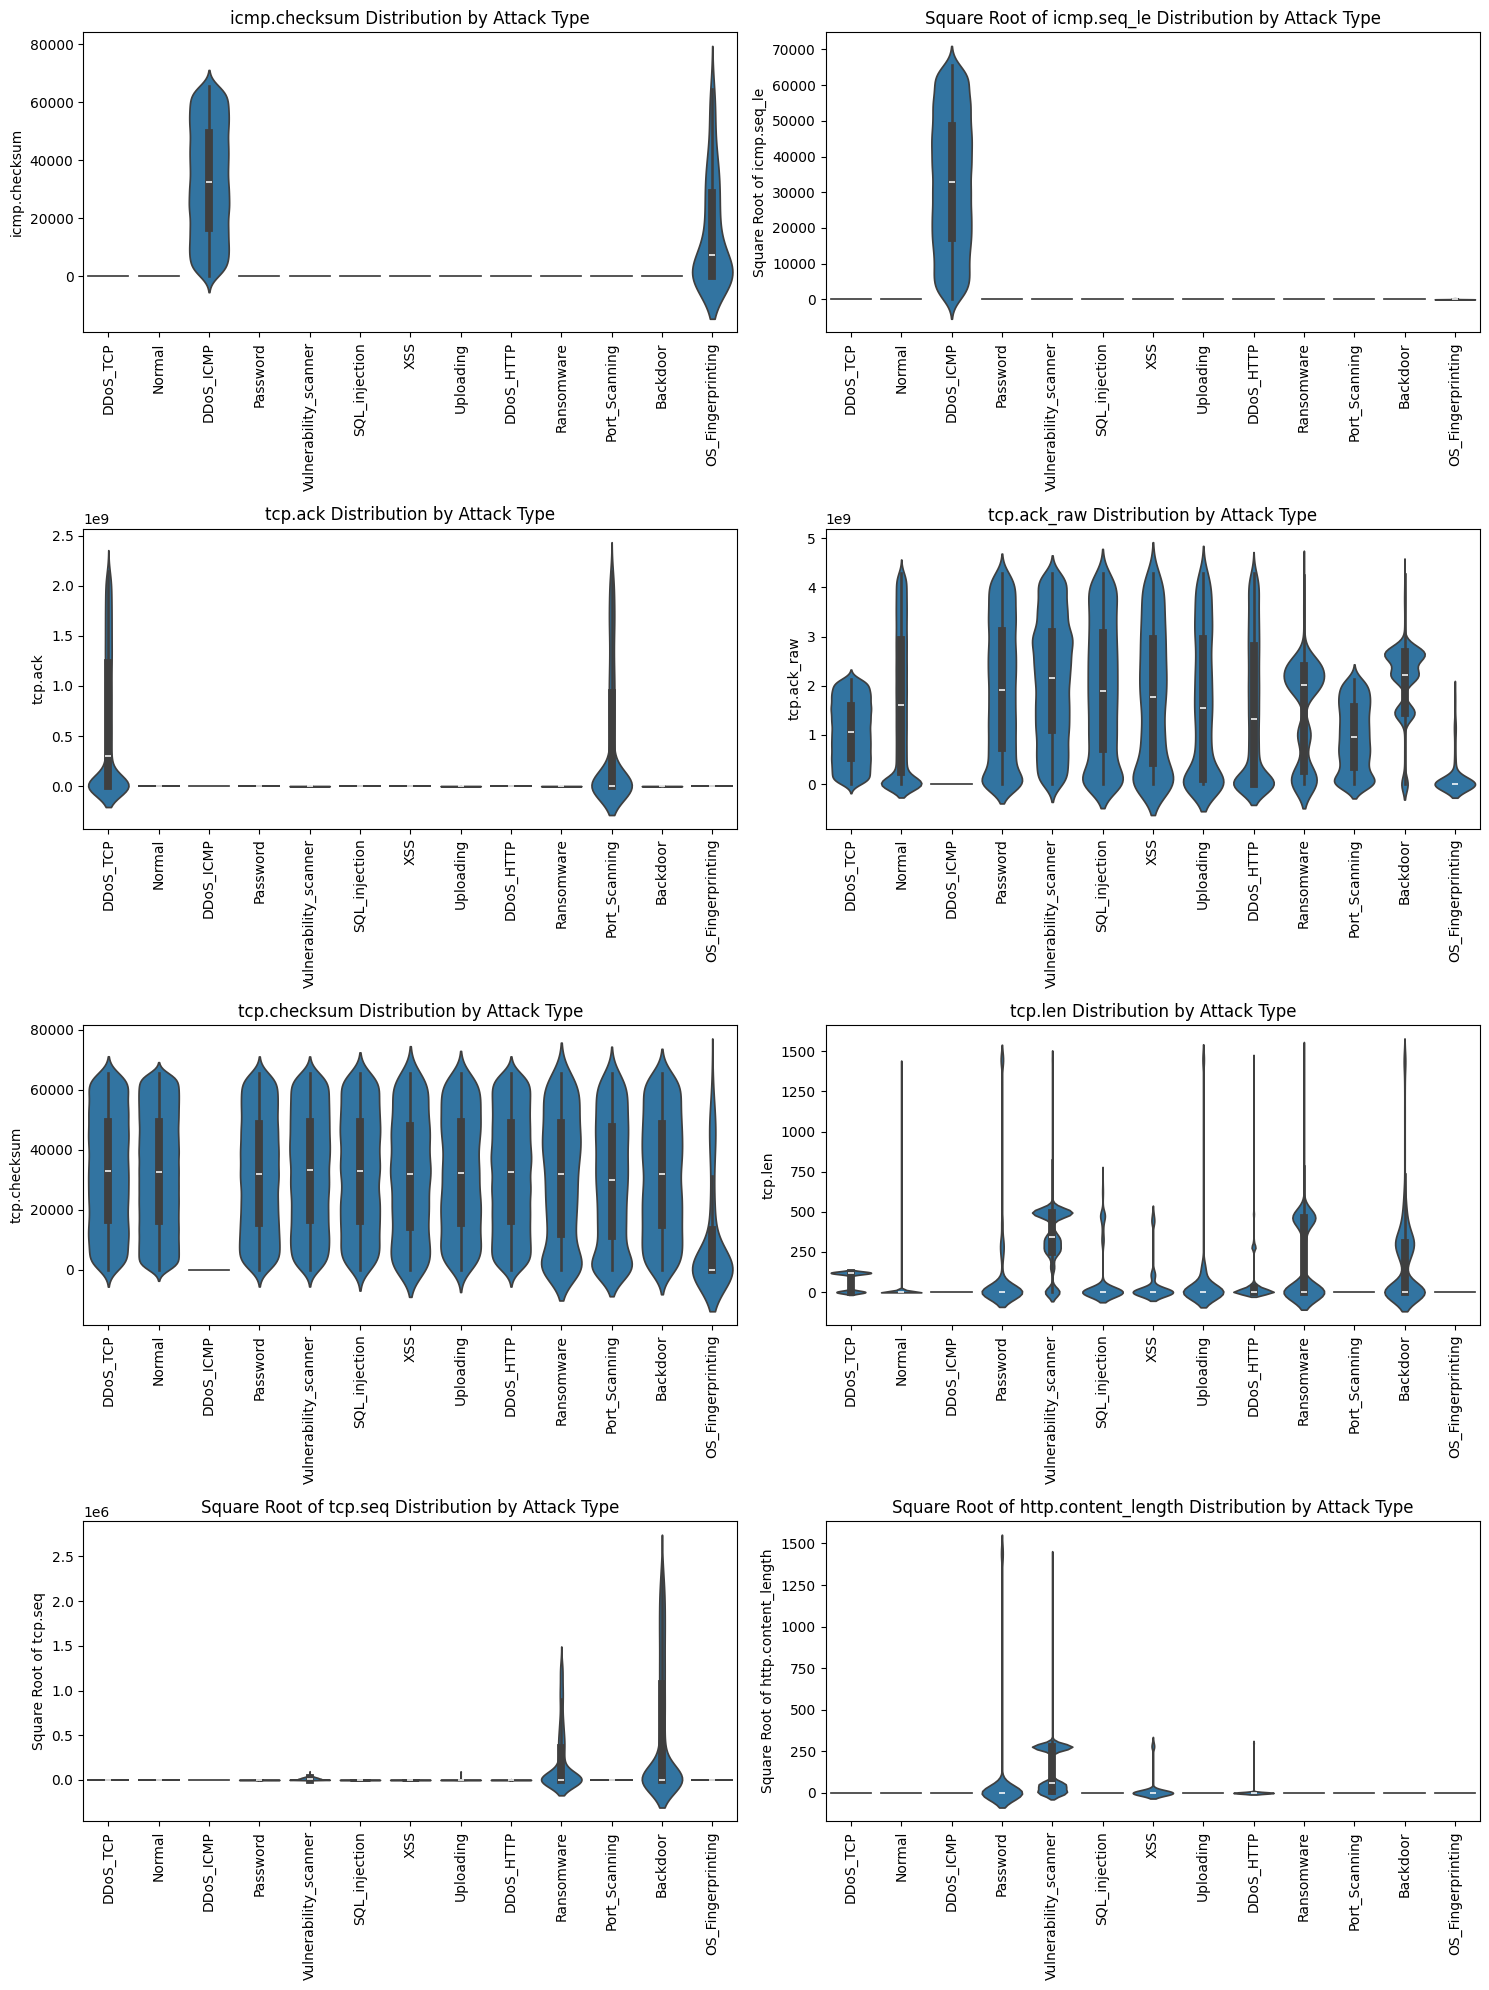

In [11]:
# Create a grid layout for subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

cols_numeric = ['icmp.checksum',
                'icmp.seq_le',
                'tcp.ack',
                'tcp.ack_raw',
                'tcp.checksum',
                'tcp.len',
                'tcp.seq',
                'http.content_length']

for i, col in enumerate(cols_numeric):
    sns.violinplot(
        data=df,
        x='Attack_type',
        y=col,
        scale='width',
        ax=axes[i],
        dodge=False,
        legend=False
    )

    # Apply square root scaling for specific columns
    if col in ['tcp.seq', 'http.content_length','icmp.seq_le',]:
        # Apply square root transformation
        axes[i].set_ylabel('Square Root of ' + col)  # Set y-axis label
        df[col] = np.sqrt(df[col])  # Apply square root transformation
        axes[i].set_title(f'Square Root of {col} Distribution by Attack Type')
    else:
        axes[i].set_title(f'{col} Distribution by Attack Type')

    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




# Relationship between Boolean Columns and Attack Type

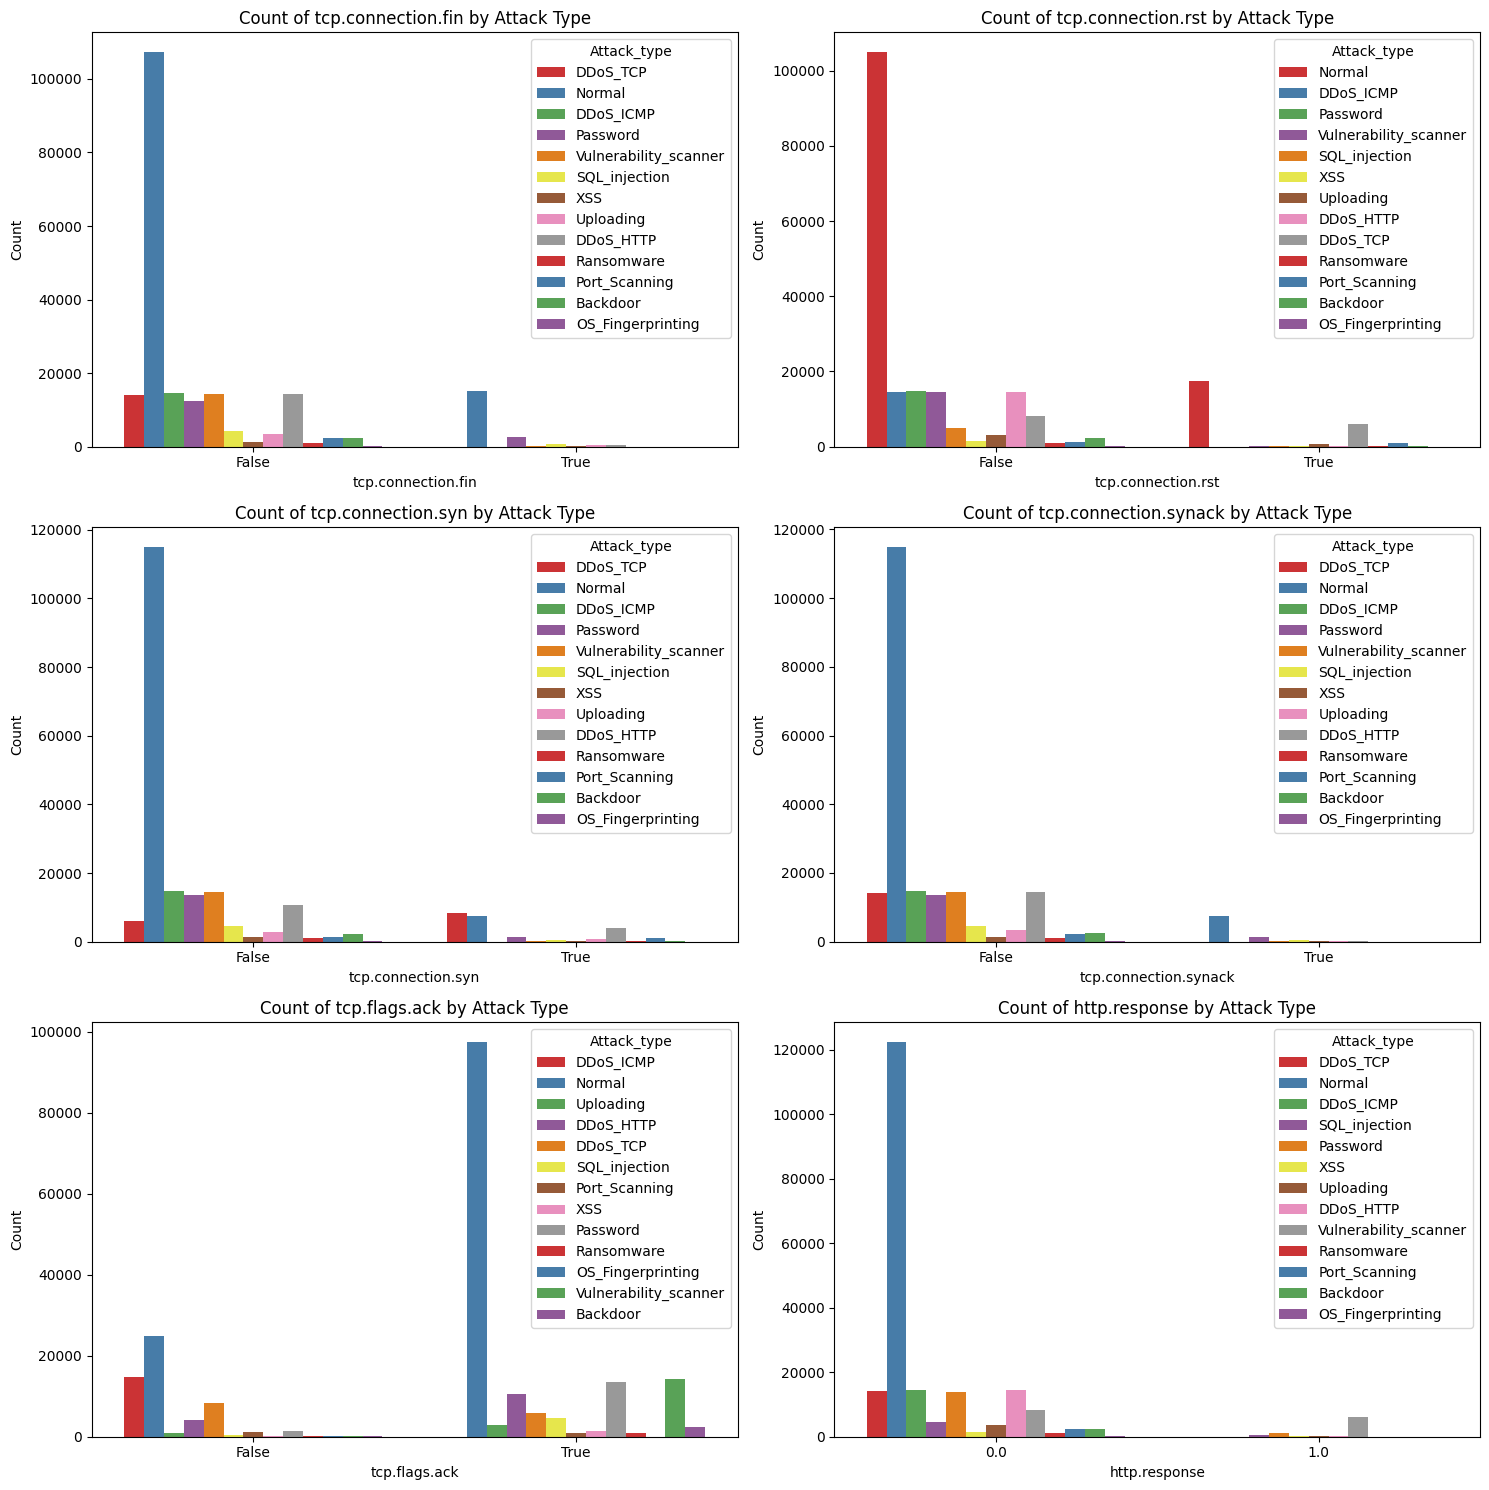

In [12]:
cols_boolean = ['tcp.connection.fin',
                'tcp.connection.rst',
                'tcp.connection.syn',
                'tcp.connection.synack',
                'tcp.flags.ack',
                'http.response']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Loop through each boolean column and create a count plot
for i, col in enumerate(cols_boolean):
    sns.countplot(data=df, x=col, hue='Attack_type', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Count of {col} by Attack Type')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)  # Adjust rotation if needed

# Remove any unused subplots (if less than 6 columns)
for j in range(len(cols_boolean), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Low cardinality Categorical Features

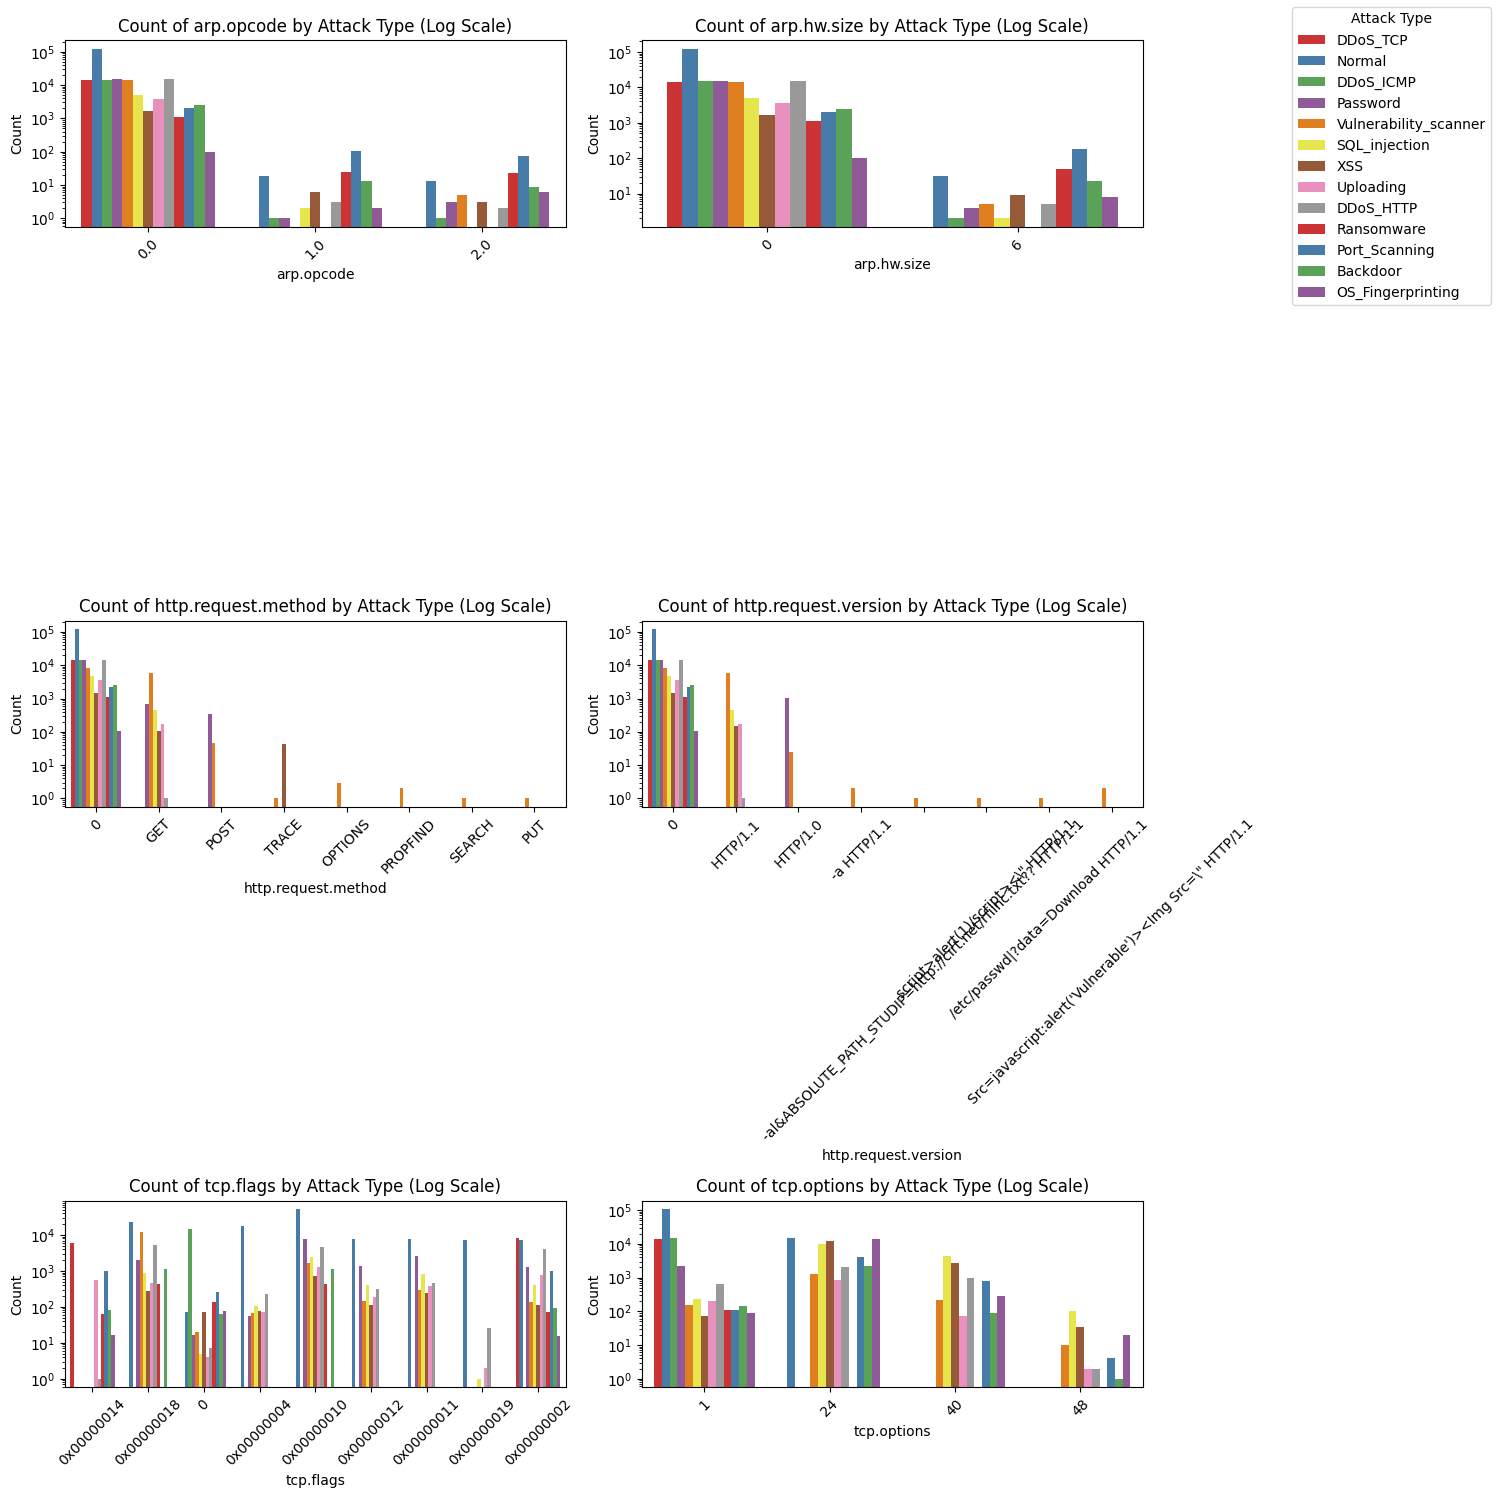

In [13]:
cols_low_cardinality = ['arp.opcode',
                'arp.hw.size',
                'http.request.method',
                'http.request.version',
                'tcp.flags',
                'tcp.options']


# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column in cols_low_cardinality
for i, col in enumerate(cols_low_cardinality):
    sns.countplot(data=df, x=col, hue='Attack_type', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Count of {col} by Attack Type (Log Scale)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility
    axes[i].set_yscale('log')  # Set y-axis to log scale for the specific subplot

# Create a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first subplot
fig.legend(handles, labels, loc='upper right', title='Attack Type')  # Add a single legend to the figure

# Remove individual legends from each subplot
for ax in axes:
    ax.legend_.remove()  # Remove the legend from the subplot

# Remove any unused subplots (if there are less than 6 columns)
for j in range(len(cols_low_cardinality), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the legend
plt.show()